# Working with Datasets

## Load dataset

In [2]:
import sklearn.datasets as datasets
iris = datasets.load_iris()

In [2]:
print("iris data size is {}".format(iris.data.shape))
print("iris target size is {}".format(iris.target.shape))
print("iris data has {} features, the feature names are {}".format(iris.data.shape[1], iris.feature_names))
print("iris data has {} samples, the target label names {}".format(iris.data.shape[1], iris.target_names))

iris data size is (150, 4)
iris target size is (150,)
iris data has 4 features, the feature names are ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris data has 4 samples, the target label names ['setosa' 'versicolor' 'virginica']


The data X shape is (100, 2)
The data y shape is (100,)


Text(0.5, 1.0, 'Data generated from make_classification')

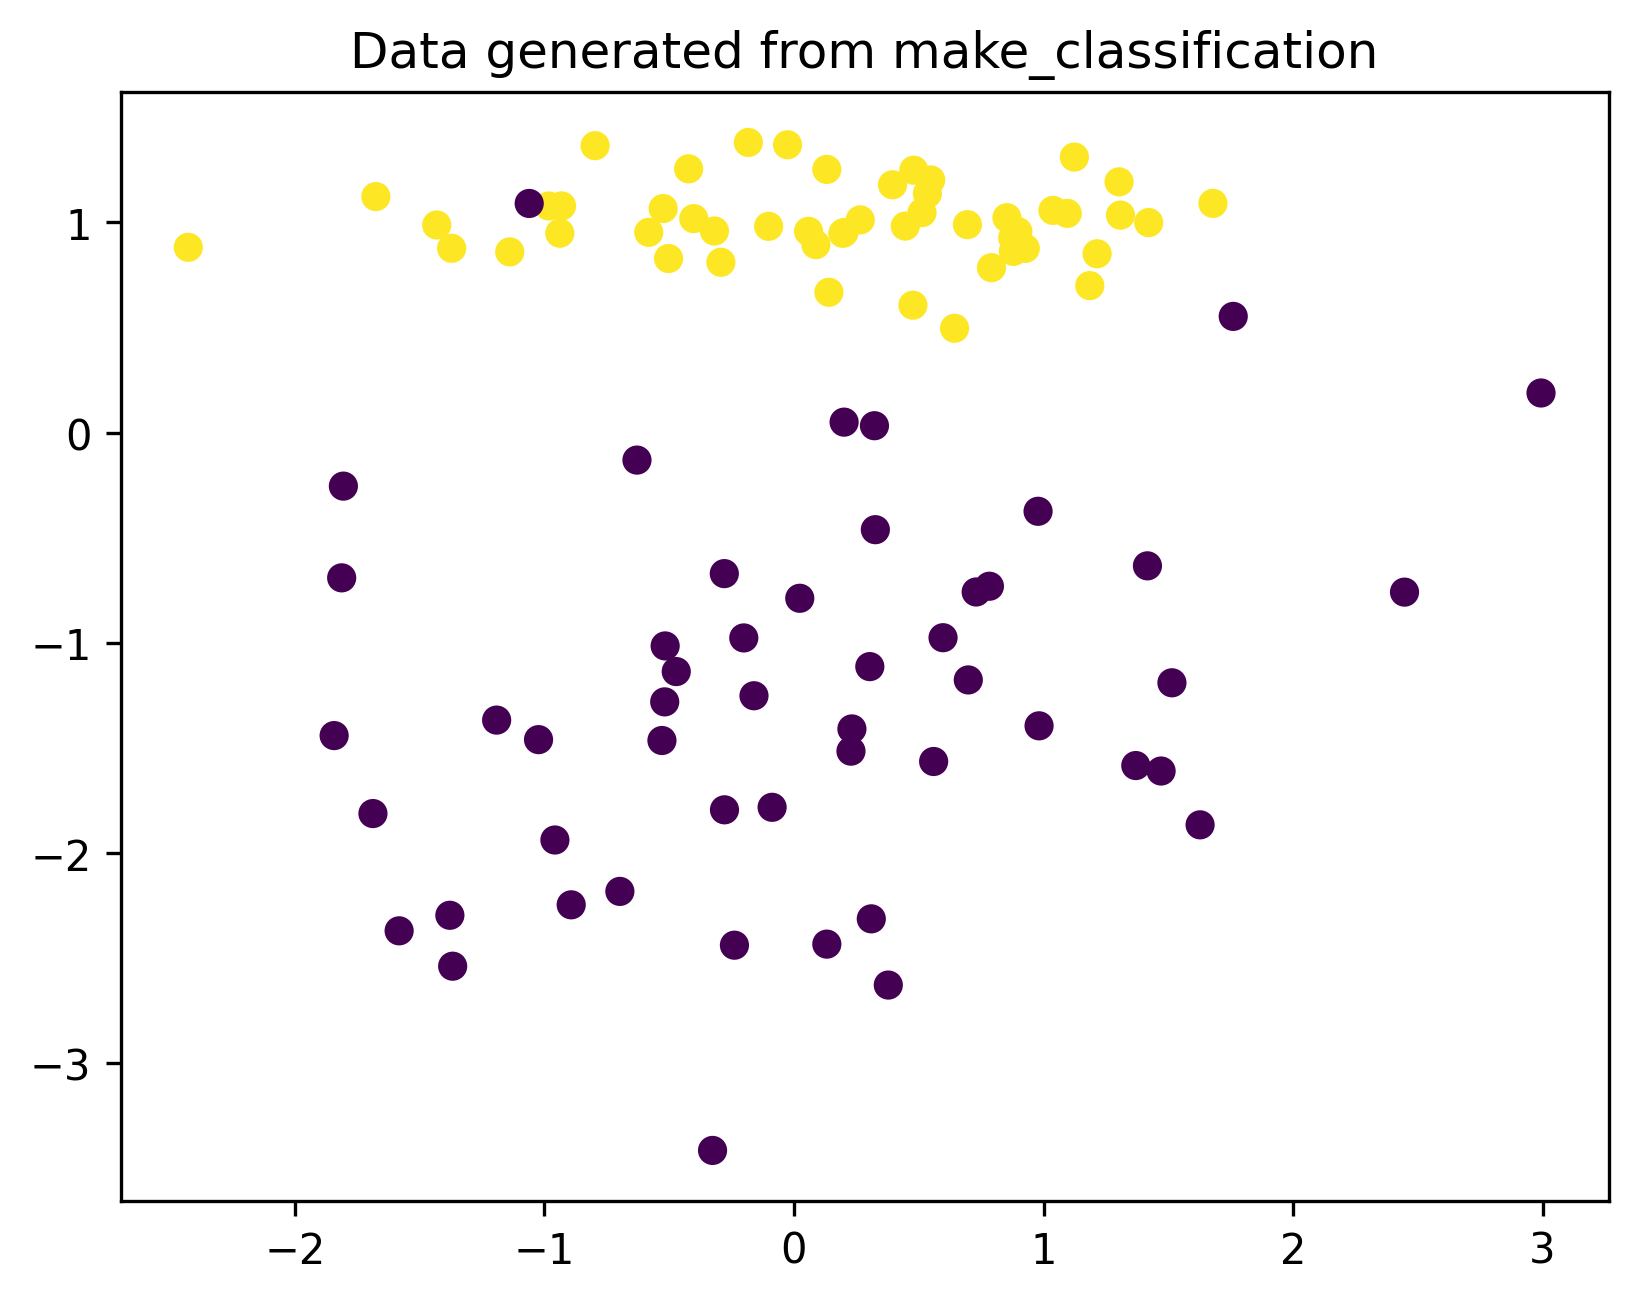

In [3]:
import matplotlib.pyplot as plt

fig, axe = plt.subplots(dpi =300)

X,y = datasets.make_classification(n_features=2,
                                   n_redundant=0,
                                   n_informative=1,
                                   n_clusters_per_class=1,
                                   random_state=45)
print("The data X shape is {}".format(X.shape))
print("The data y shape is {}".format(y.shape))

axe.scatter(X[:,0], X[:,1], c=y, marker = 'o')
axe.set_title("Data generated from make_classification")

The regression data X shape is (100, 1)
The regression data y shape is (100,)


Text(0.5, 1.0, 'Data generated from make_regression')

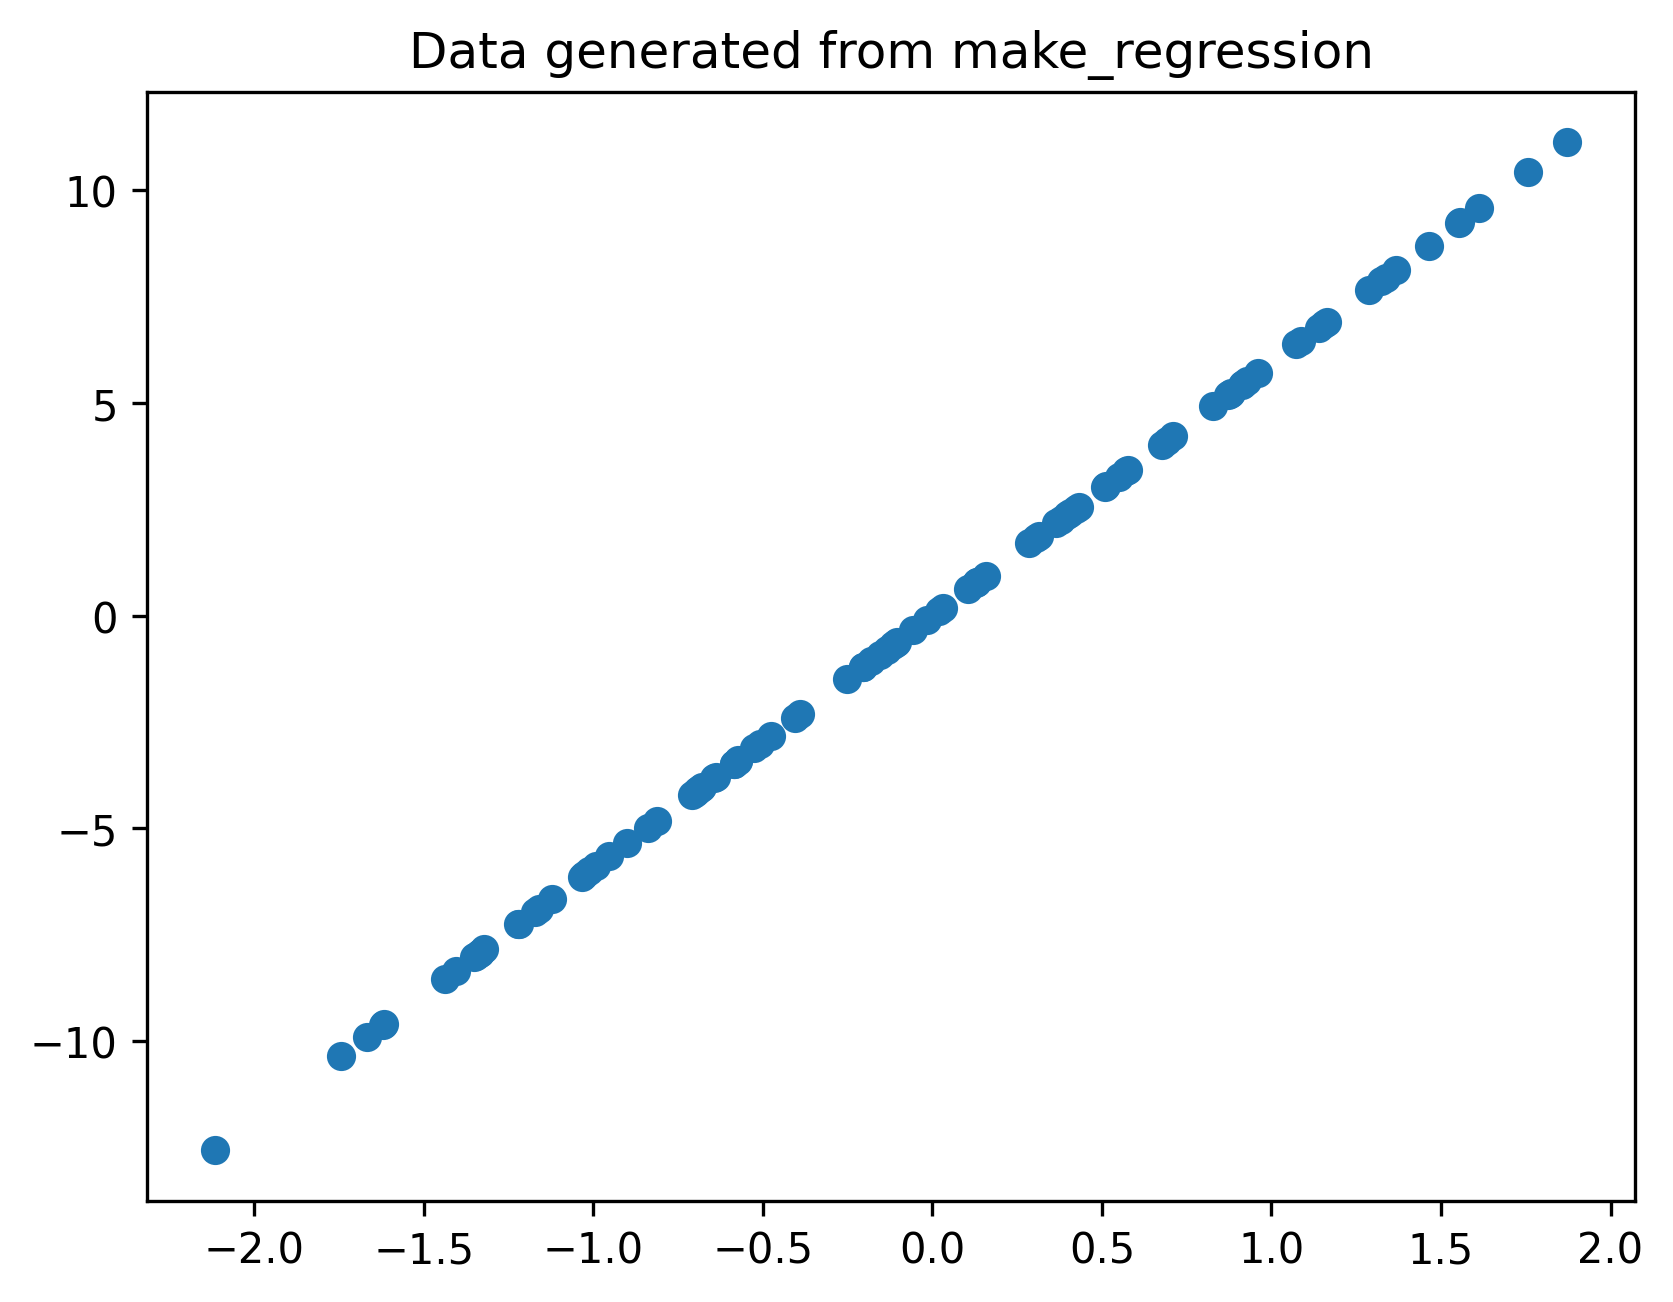

In [4]:
fig, axe = plt.subplots(dpi = 300)
X, y = datasets.make_regression(n_features=1, n_informative=1)
print("The regression data X shape is {}".format(X.shape))
print("The regression data y shape is {}".format(y.shape))

axe.scatter(X, y, marker='o')
axe.set_title("Data generated from make_regression")

### Data Preprocessing

In [5]:
import sklearn.preprocessing as preprocessing

minmax = preprocessing.MinMaxScaler()
# X is a matrix with float type
minmax.fit(X)
X_minmax = minmax.transform(X)

In [6]:
import numpy as np

X = np.random.randint(2, 10, size=(4, 2))
X2 = np.random.randint(100, 10000, size=(4, 2))
X = np.concatenate((X, X2), axis=1)
print("The original matrix")
print(X)

#### min-max scaler

minmax = preprocessing.MinMaxScaler()
minmax.fit(X)
X_minmax = minmax.transform(X)
print("The transform data using min-max scaler")
print(X_minmax)

The original matrix
[[   5    5 3769 4787]
 [   4    7 1093 7262]
 [   6    9 2755  568]
 [   3    8 1501 2213]]
The transform data using min-max scaler
[[0.66666667 0.         1.         0.63026591]
 [0.33333333 0.5        0.         1.        ]
 [1.         1.         0.62107623 0.        ]
 [0.         0.75       0.15246637 0.24574246]]


In [7]:
std = preprocessing.StandardScaler()
# X is a matrix
std.fit(X)
X_std = std.transform(X)

In [8]:
X = np.random.randint(2, 10, size=(4, 2))
X2 = np.random.randint(100, 10000, size=(4, 2))
X = np.concatenate((X, X2), axis=1)
print("The original matrix")
print(X)

std = preprocessing.StandardScaler()
std.fit(X)
X_std = std.transform(X)
print("The transform data using Standard scaler")
print(X_std)

The original matrix
[[   5    4 8038 6468]
 [   5    3 3036 9696]
 [   7    9 1472 6915]
 [   7    9 7736 8605]]
The transform data using Standard scaler
[[-1.         -0.81150267  1.03316124 -1.11920608]
 [-1.         -1.17217053 -0.70832908  1.36723386]
 [ 1.          0.9918366  -1.25284944 -0.77489423]
 [ 1.          0.9918366   0.92801728  0.52686646]]


In [9]:
Xb = np.array([[0.2, 0.4, 0.9, 0.7, 0.1, 0.8], [0.8, 0.1, 0.2, 0.8, 0.1, 0.4]])
binary = preprocessing.Binarizer(threshold=0.7)
X_binary = binary.transform(Xb)
print("The original data")
print(Xb)
print("The transform data using Binarizer with threshold 0.7")
print(X_binary)

The original data
[[0.2 0.4 0.9 0.7 0.1 0.8]
 [0.8 0.1 0.2 0.8 0.1 0.4]]
The transform data using Binarizer with threshold 0.7
[[0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]]


In [10]:
targets = np.array(["Sun", "Sun", "Moon", "Earth", "Monn", "Venus"])
labelenc = preprocessing.LabelEncoder()
labelenc.fit(targets)
targets_trans = labelenc.transform(targets)
print("The original data")
print(targets)
print("The transform data using LabelEncoder")
print(targets_trans)

The original data
['Sun' 'Sun' 'Moon' 'Earth' 'Monn' 'Venus']
The transform data using LabelEncoder
[3 3 2 0 1 4]


### Feature Extraction

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
counterVec = CountVectorizer()
# corpus is a list of string in this example, such as:
corpus = [
   "I have an apple.",
   "The apple is red",
   "I like the apple"
   ]
counterVec.fit(corpus)
# corpus_data is a matrix with 0/1.
corpus_data = counterVec.transform(corpus)
corpus_data

<3x7 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [12]:
corpus = [
    "I have an apple.", "The apple is red", "I like the apple",
    "I like the orange", "Apple and orange are fruit", "The orange is yellow"
]

counterVec = CountVectorizer(ngram_range=(1, 2))
counterVec.fit(corpus)
print("Get all the feature names of this corpus")
print(counterVec.get_feature_names())
print("The number of feature is {}".format(len(
    counterVec.get_feature_names())))
corpus_data = counterVec.transform(corpus)
print("The transform data's shape is {}".format(corpus_data.toarray().shape))
print(corpus_data.toarray())

Get all the feature names of this corpus
['an', 'an apple', 'and', 'and orange', 'apple', 'apple and', 'apple is', 'are', 'are fruit', 'fruit', 'have', 'have an', 'is', 'is red', 'is yellow', 'like', 'like the', 'orange', 'orange are', 'orange is', 'red', 'the', 'the apple', 'the orange', 'yellow']
The number of feature is 25
The transform data's shape is (6, 25)
[[1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0]
 [0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1]]


/dsw/snapshots/3577215c-cc5b-4654-9900-faef6a8514f2/python310/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
